<a href="https://colab.research.google.com/github/ihagoSantos/machine_learning/blob/main/data_transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação e configuração de bibliotecas

In [1]:
import numpy as np # usada para processamento numérico
import pandas as pd # usada para manipulação de bases de dados
import matplotlib.pyplot as plt # usada para visualização de dados
import seaborn as sns # usada para visualização de dados

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [5]:
# Configuração de visualização
np.set_printoptions(threshold=None, precision=2)

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.precision', 2)

# Base de dados do Titanic

In [6]:
from google.colab import files

uploaded = files.upload()

Saving train.csv to train.csv


In [13]:
titanic_train = pd.read_csv(next(iter(uploaded.keys())))

print("Dimensões de Titanic: \n{0}\n".format(titanic_train.shape))
print("Campos de Titanic: \n{0}\n".format(list(titanic_train.keys())))
print("Tipos de dados: \n{0}\n".format(titanic_train.dtypes))

Dimensões de Titanic: 
(891, 12)

Campos de Titanic: 
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Tipos de dados: 
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object



# Estatística Descritiva dos Dados

In [18]:
# Exibe apenas os campos numéricos
print("\nDescrição dos campos numéricos:\n")
print(titanic_train.describe())
# survived: (0 = não, 1 = sim) -> foi considerado como numérico mas é categórico
# Pclass: -> foi considerado como numérico mas é categórico

# Para se ter uma visão dos atributos categóricos, os atributos não numéricos são descartados.
print("\n\nDescrição dos campos não numéricos:")
categ = titanic_train.dtypes[titanic_train.dtypes == 'object'].index
print("\n", titanic_train[categ].describe(), sep='\n')


Descrição dos campos numéricos:

       PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33


Descrição dos campos não numéricos:


                           Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7    

# Remoção de atributos irrelevantes

In [23]:
del titanic_train['PassengerId']
del titanic_train['Ticket']

# O número de atributos reduziu para 10
print('Dimensões de Titanic: \n{0}\n'.format(titanic_train.shape))

Dimensões de Titanic: 
(891, 10)



# Transformação de Variáveis

## Converter numérico em categórico

In [30]:
new_survived = pd.Categorical(titanic_train['Survived'])
new_survived = new_survived.rename_categories(['Morreu', 'Sobrevivel'])
titanic_train['Survived'] = new_survived

new_Pclass = pd.Categorical(titanic_train['Pclass'], ordered=True)
new_Pclass = new_Pclass.rename_categories(["1aClasse", "2aClasse", "3aClasse"])
titanic_train['Pclass'] = new_Pclass

print('Tipos de dados: \n{0}\n'.format(titanic_train.dtypes))
categ = titanic_train.dtypes[titanic_train.dtypes == 'category'].index
print('\n', titanic_train[categ].describe(), sep='\n')

Tipos de dados: 
Survived    category
Pclass      category
Name          object
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin         object
Embarked      object
dtype: object



       Survived    Pclass
count       891       891
unique        2         3
top      Morreu  3aClasse
freq        549       491


## Converter atributo através de processamento de string (usando list comprehension)

In [33]:
# Exibe valores únicos
print("Valores únicos do atributo Cabin:", titanic_train['Cabin'].unique(), sep='\n')

# O campo Cabin está como object, é necessário convertê-lo para string
char_cabin = titanic_train['Cabin'].astype(str)

# Pega apenas a primeira letra
new_cabin = pd.Categorical([cabin[0] for cabin in char_cabin])
titanic_train['Cabin'] = new_cabin
print('\nValores únicos do atributo Cabin:', titanic_train['Cabin'].unique(), sep='\n')

Valores únicos do atributo Cabin:
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']

Valores 

# Valores Omissos ou inconsistentes
Em atributos numéricos, as possibilidades são:
1. substituir por zeros;
2. substituir por um valor médio ou mediano;
3. estimar valores usando modelos estatísticos ou preditivos;
4. particionar a base em registros completos e registros incompletos.

Vamos analisar o atributo *Age* apra tratarmos os valores omissos.

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

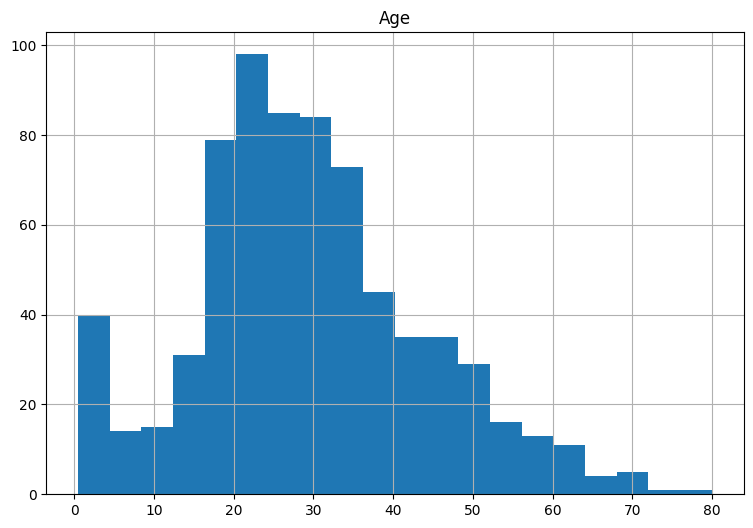

In [36]:
titanic_train.hist(
    column='Age',   # Coluna a ser plotada
    figsize=(9,6),  # Tamanho do gráfico
    bins=20         # Número de colunas do histograma
)